In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import datetime

In [44]:
df = pd.read_csv("/home/aditya/flask/ml/dataset/open-meteo-18.62N74.00E561m.csv")

In [45]:
df.head()

,location_id,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h)
0,0,2023-01-01T00:00,13.7,91,12.2,0.0,1017.3,951.9,0,2.8
1,0,2023-01-01T01:00,13.4,92,12.1,0.0,1018.0,952.5,0,3.1
2,0,2023-01-01T02:00,13.2,92,12.0,0.0,1019.1,953.5,0,3.1
3,0,2023-01-01T03:00,15.9,81,12.7,0.0,1019.5,954.5,0,2.1
4,0,2023-01-01T04:00,19.7,66,13.2,0.0,1020.4,956.2,0,1.8


In [46]:
df.nunique()

location_id                     6
time                        21864
temperature_2m (°C)           366
relative_humidity_2m (%)       95
dew_point_2m (°C)             285
rain (mm)                     134
pressure_msl (hPa)            244
surface_pressure (hPa)        404
cloud_cover (%)               101
wind_speed_10m (km/h)         246
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131184 entries, 0 to 131183
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   location_id               131184 non-null  int64  
 1   time                      131184 non-null  object 
 2   temperature_2m (°C)       131184 non-null  float64
 3   relative_humidity_2m (%)  131184 non-null  int64  
 4   dew_point_2m (°C)         131184 non-null  float64
 5   rain (mm)                 131184 non-null  float64
 6   pressure_msl (hPa)        131184 non-null  float64
 7   surface_pressure (hPa)    131184 non-null  float64
 8   cloud_cover (%)           131184 non-null  int64  
 9   wind_speed_10m (km/h)     131184 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 10.0+ MB


In [48]:
df['date_time'] = pd.to_datetime(df['time'])

In [49]:
df['month'] = df['date_time'].dt.month

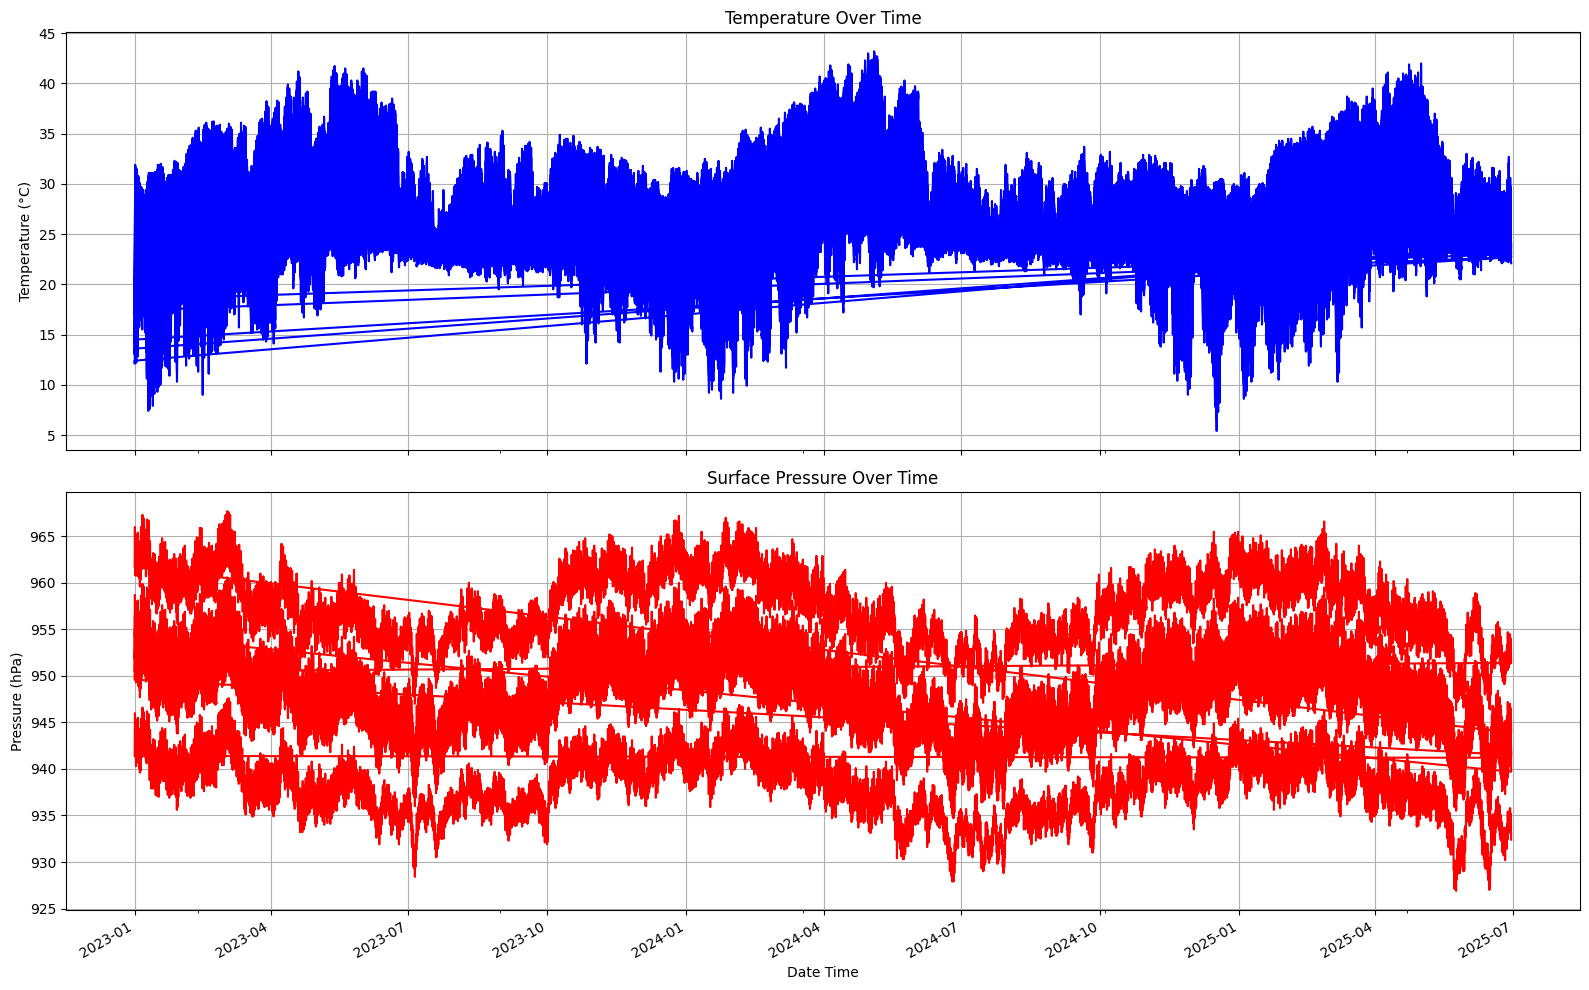

In [50]:


fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)  # 2 rows, 1 column

# First plot: Temperature
df.plot(x='date_time', y='temperature_2m (°C)', ax=axes[0], color='blue', legend=False)
axes[0].set_title("Temperature Over Time")
axes[0].set_ylabel("Temperature (°C)")
axes[0].grid(True)

# Second plot: Pressure
df.plot(x='date_time', y='surface_pressure (hPa)', ax=axes[1], color='red', legend=False)
axes[1].set_title("Surface Pressure Over Time")
axes[1].set_xlabel("Date Time")
axes[1].set_ylabel("Pressure (hPa)")
axes[1].grid(True)

# Final layout adjustments
plt.tight_layout()
plt.show()


not having any trend

data is seasonal

In [51]:
from statsmodels.tsa.stattools import adfuller

In [52]:


# Ho = Data is not stationary
# H1 = Data is stationary

def adfuller_test(series):
    result = adfuller(series)
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
    
    for value, label in zip(result[:4], labels):
        print(f"{label} : {value}")
    
    if result[1] <= 0.05:
        print("Reject the null hypothesis — data is **stationary**.")
    else:
        print("Fail to reject the null hypothesis — data is **not stationary**.")


In [53]:
adfuller_test(df['temperature_2m (°C)'])

ADF Statistic : -10.66115448728148
p-value : 4.403769950696858e-19
# Lags Used : 73
# Observations Used : 131110
Reject the null hypothesis — data is **stationary**.


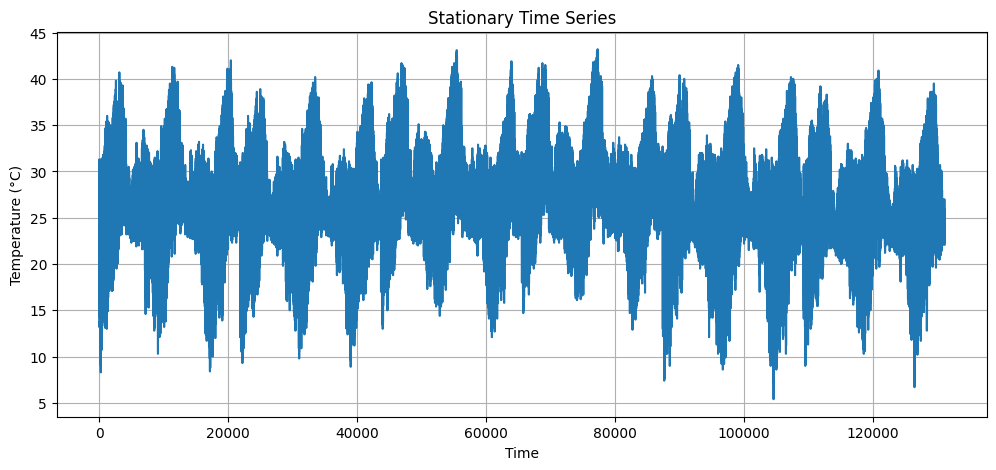

In [54]:
plt.figure(figsize=(12,5))
plt.plot(df['temperature_2m (°C)'])
plt.title("Stationary Time Series")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

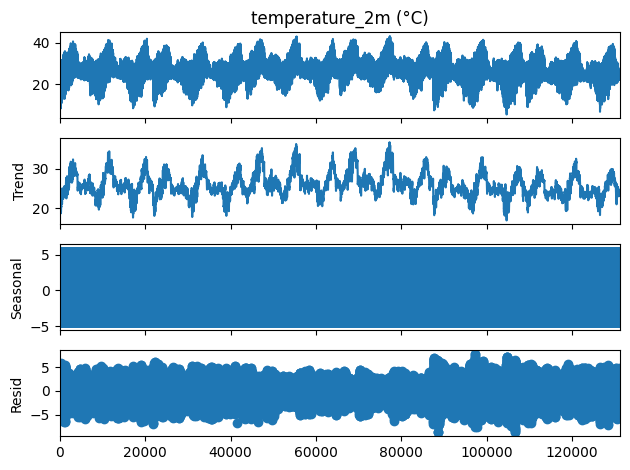

In [56]:
result = seasonal_decompose(df['temperature_2m (°C)'], model='additive', period=24)
result.plot()
plt.show()


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131184 entries, 0 to 131183
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   location_id               131184 non-null  int64         
 1   time                      131184 non-null  object        
 2   temperature_2m (°C)       131184 non-null  float64       
 3   relative_humidity_2m (%)  131184 non-null  int64         
 4   dew_point_2m (°C)         131184 non-null  float64       
 5   rain (mm)                 131184 non-null  float64       
 6   pressure_msl (hPa)        131184 non-null  float64       
 7   surface_pressure (hPa)    131184 non-null  float64       
 8   cloud_cover (%)           131184 non-null  int64         
 9   wind_speed_10m (km/h)     131184 non-null  float64       
 10  date_time                 131184 non-null  datetime64[ns]
 11  month                     131184 non-null  int32         
dtypes:

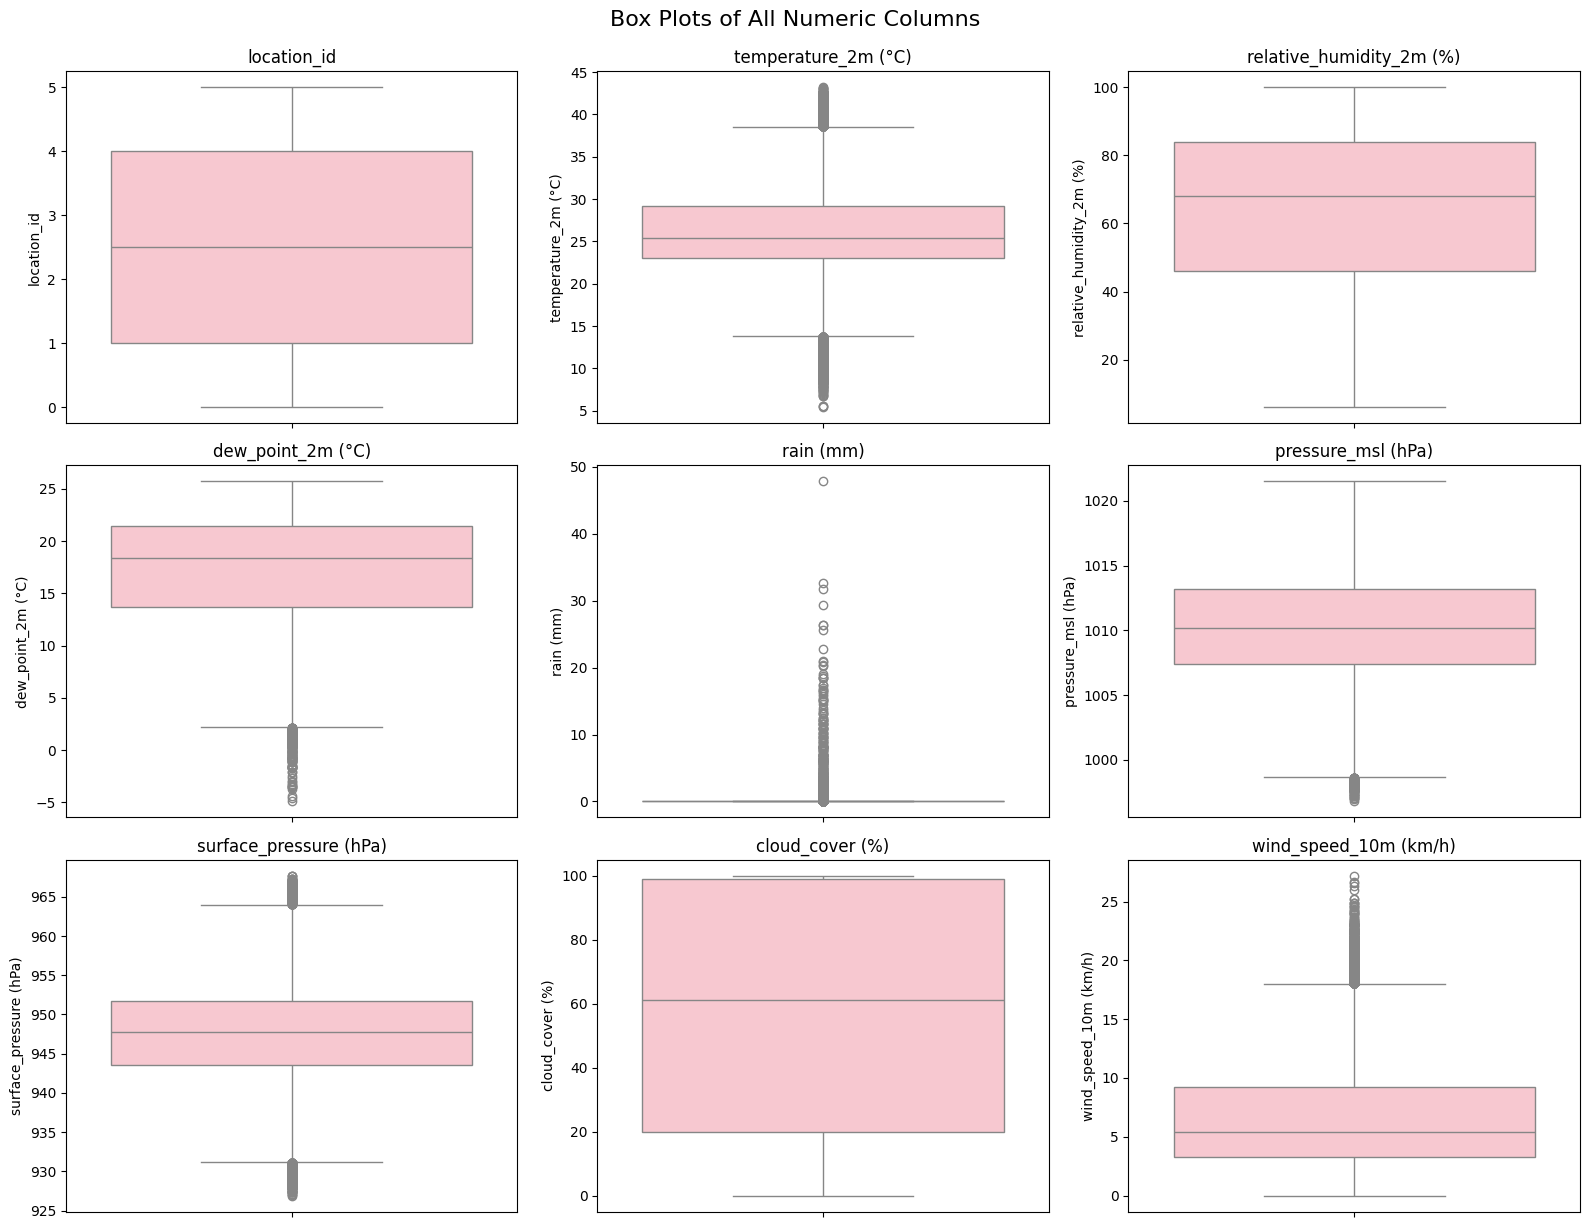

In [58]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)  # arrange in rows of 3
    sns.boxplot(y=df[col], color='pink')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of All Numeric Columns", fontsize=16, y=1.02)
plt.show()

In [59]:
def remove_outliers_iqr(df, exclude_columns=[]):
    """
    Removes outliers using the IQR method for all numeric columns
    except those listed in exclude_columns.
    """
    df_clean = df.copy()
    
    # Select only numeric columns (excluding optional columns like 'location_id')
    numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_columns]

    # Apply IQR filtering
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before = df_clean.shape[0]
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        after = df_clean.shape[0]

        print(f"{col:30s} → Removed {before - after} rows")

    return df_clean


In [60]:
# Optionally exclude 'location_id' or any categorical IDs
df_cleaned = remove_outliers_iqr(df, exclude_columns=['location_id'])


temperature_2m (°C)            → Removed 2841 rows
relative_humidity_2m (%)       → Removed 0 rows
dew_point_2m (°C)              → Removed 283 rows
rain (mm)                      → Removed 2914 rows
pressure_msl (hPa)             → Removed 130 rows
surface_pressure (hPa)         → Removed 725 rows
cloud_cover (%)                → Removed 0 rows
wind_speed_10m (km/h)          → Removed 1693 rows


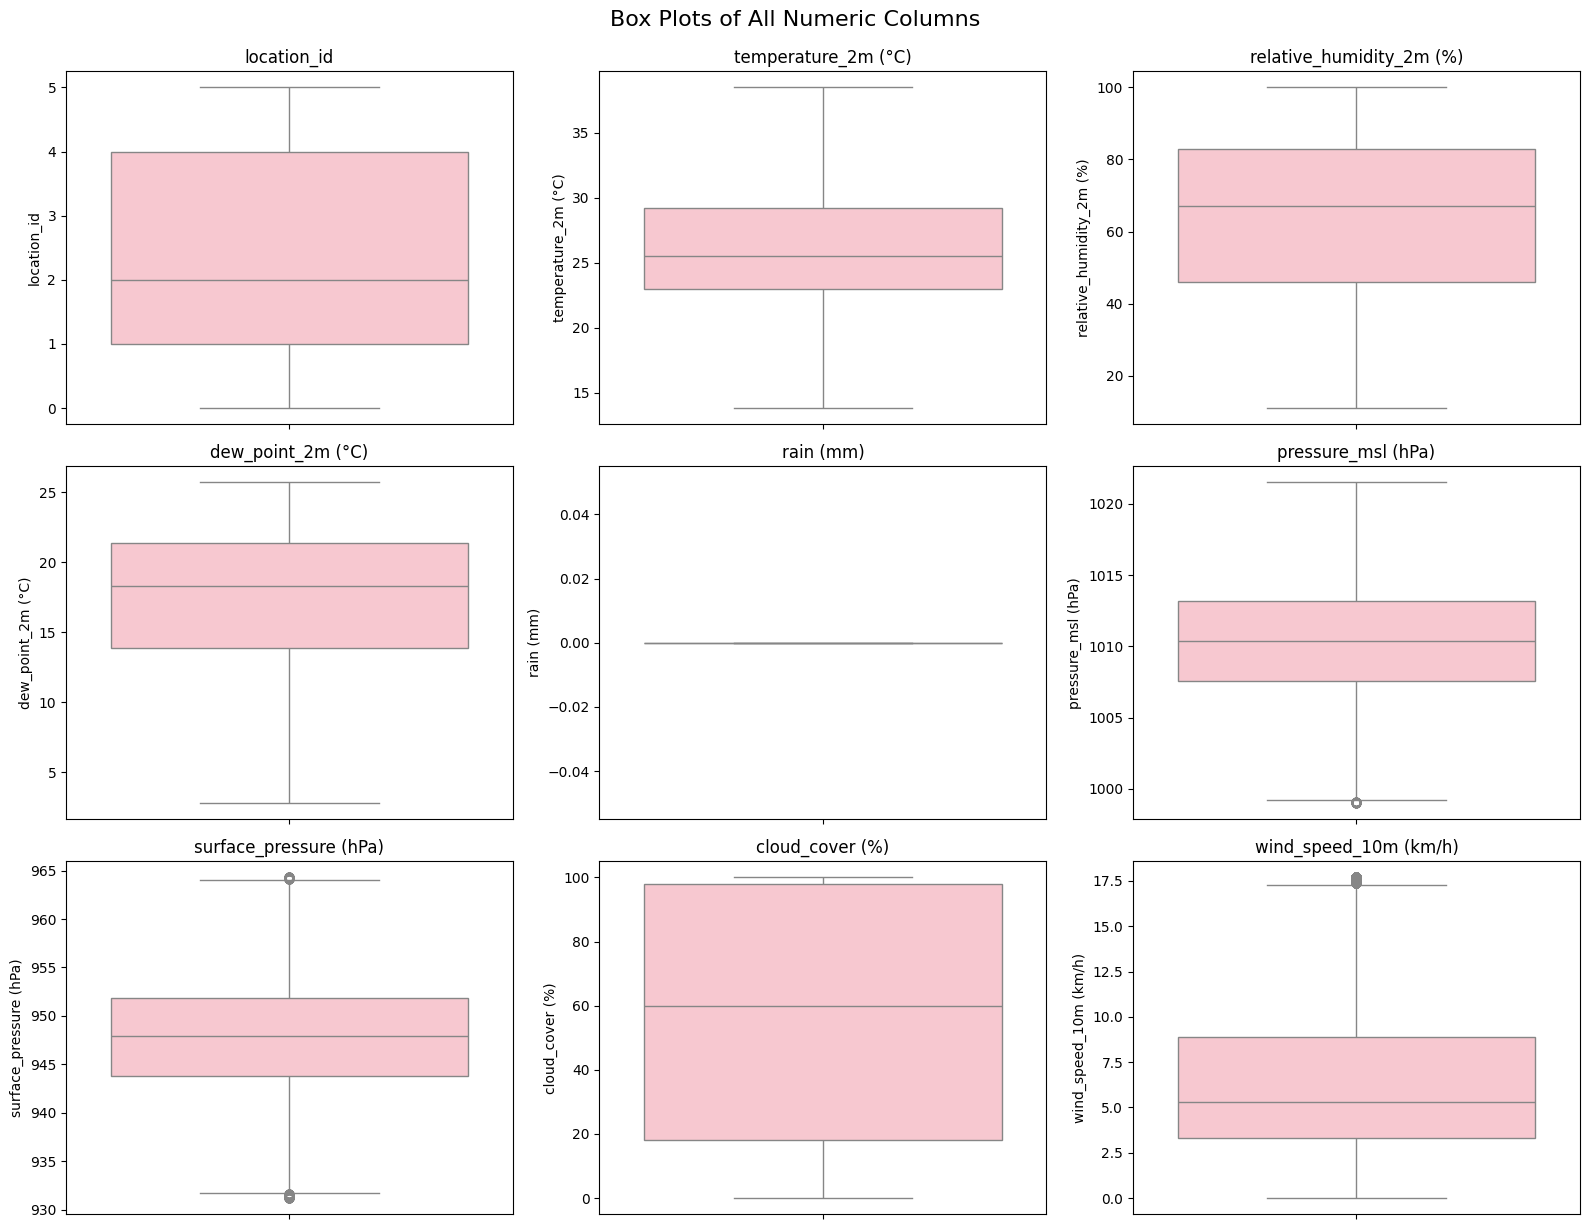

In [61]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)  # arrange in rows of 3
    sns.boxplot(y=df_cleaned[col], color='pink')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of All Numeric Columns", fontsize=16, y=1.02)
plt.show()


In [62]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
# Apply MinMaxScaler
columns_to_scale = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
columns_to_scale = [col for col in columns_to_scale if col not in ['location_id', 'month']]

In [65]:
scaler = MinMaxScaler()
df_scaled = df_cleaned.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

In [66]:
# Generate cyclical features: hour, dayofweek, month
df_scaled['hour'] = df_scaled['date_time'].dt.hour
df_scaled['dayofweek'] = df_scaled['date_time'].dt.dayofweek
df_scaled['month'] = df_scaled['date_time'].dt.month

df_scaled['sin_hour'] = np.sin(2 * np.pi * df_scaled['hour'] / 24)
df_scaled['cos_hour'] = np.cos(2 * np.pi * df_scaled['hour'] / 24)

df_scaled['sin_dayofweek'] = np.sin(2 * np.pi * df_scaled['dayofweek'] / 7)
df_scaled['cos_dayofweek'] = np.cos(2 * np.pi * df_scaled['dayofweek'] / 7)

df_scaled['sin_month'] = np.sin(2 * np.pi * df_scaled['month'] / 12)
df_scaled['cos_month'] = np.cos(2 * np.pi * df_scaled['month'] / 12)

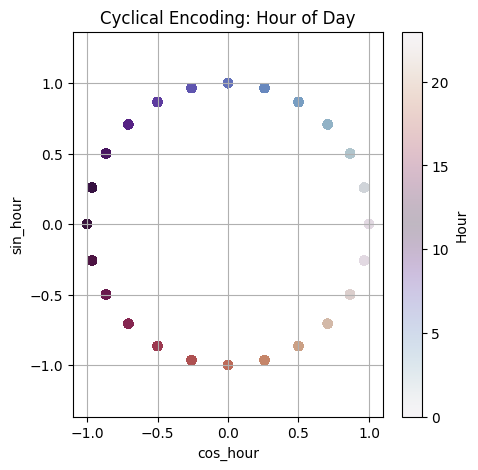

In [68]:
# Hour
plt.figure(figsize=(5, 5))
plt.scatter(df_scaled['cos_hour'], df_scaled['sin_hour'], alpha=0.3, c=df_scaled['hour'], cmap='twilight')
plt.title("Cyclical Encoding: Hour of Day")
plt.xlabel("cos_hour")
plt.ylabel("sin_hour")
plt.axis('equal')
plt.grid(True)
plt.colorbar(label="Hour")
plt.show()


In [69]:
# STEP 11: Supervised Dataset Creation (generalized across locations)
def create_supervised_with_location(df, target_col, window=24):
    features, targets = [], []
    locations = []
    grouped = df.groupby('location_id')
    for loc, group in grouped:
        group = group.sort_values('date_time')
        for i in range(window, len(group)):
            X = group.iloc[i-window:i][target_col].values
            location_feature = [loc]  # Can later one-hot encode if needed
            full_features = np.concatenate((X, location_feature))
            y = group.iloc[i][target_col]
            features.append(full_features)
            targets.append(y)
    return np.array(features), np.array(targets)

In [70]:

X, y = create_supervised_with_location(df_scaled, target_col='temperature_2m (°C)', window=24)

In [94]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [76]:
print("x_train shape : ",X_train.shape)
print("x_test shape : ",X_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (97963, 25)
x_test shape :  (24491, 25)
y_train shape :  (97963,)
y_test shape :  (24491,)


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [96]:
param_dist = {
    'n_estimators': [5, 10, 50],               
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']             # Replace 'auto' with valid options
}


In [98]:
base_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train, y_train)
model = random_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5; total time=   2.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   2.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   2.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5; total time=   2.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5; total time=   2.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   2.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   2.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=

In [100]:
print(f"[INFO] Best Parameters: {random_search.best_params_}")

[INFO] Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}


In [101]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    median_absolute_error,
    mean_absolute_percentage_error,
    explained_variance_score
)

In [102]:
# STEP 14: Evaluate Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE)         : {mae:.4f}")
print(f"Mean Squared Error (MSE)          : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)    : {rmse:.4f}")
print(f"R² Score                          : {r2:.4f}")
print(f"Median Absolute Error (MedAE)     : {medae:.4f}")
print(f"Mean Absolute Percentage Error    : {mape:.4f}")
print(f"Explained Variance Score (EVS)    : {evs:.4f}")



Mean Absolute Error (MAE)         : 0.0180
Mean Squared Error (MSE)          : 0.0008
Root Mean Squared Error (RMSE)    : 0.0290
R² Score                          : 0.9789
Median Absolute Error (MedAE)     : 0.0111
Mean Absolute Percentage Error    : 305695899219.5812
Explained Variance Score (EVS)    : 0.9790


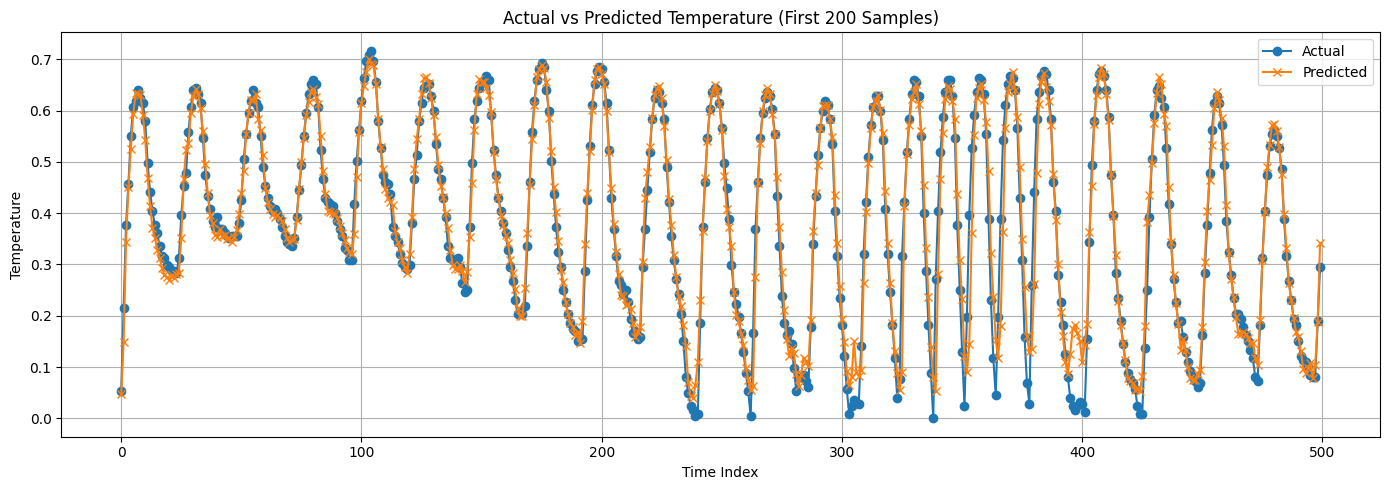

In [103]:
# STEP 15: Plot Actual vs Predicted
plt.figure(figsize=(14,5))
plt.plot(y_test[:500], label='Actual', marker='o')
plt.plot(y_pred[:500], label='Predicted', marker='x')
plt.title("Actual vs Predicted Temperature (First 200 Samples)")
plt.ylabel("Temperature")
plt.xlabel("Time Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
